In [1]:
!wget https://s3-ap-southeast-1.amazonaws.com/crimes/Crimes_-_2001_to_present.csv

converted 'https://s3-ap-southeast-1.amazonaws.com/crimes/Crimes_-_2001_to_present.csv' (ANSI_X3.4-1968) -> 'https://s3-ap-southeast-1.amazonaws.com/crimes/Crimes_-_2001_to_present.csv' (UTF-8)
--2015-11-16 05:47:50--  https://s3-ap-southeast-1.amazonaws.com/crimes/Crimes_-_2001_to_present.csv
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 54.231.242.138
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|54.231.242.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1396400271 (1.3G) [application/octet-stream]
Saving to: 'Crimes_-_2001_to_present.csv'

Crimes_-_2001_to_pr 100%[=====================>]   1.30G  83.3MB/s   in 19s    

2015-11-16 05:48:09 (69.4 MB/s) - 'Crimes_-_2001_to_present.csv' saved [1396400271/1396400271]



In [3]:
import pandas as pd
from pandas import *
import pylab as pyl
from pylab import *
import csv
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
import itertools


file = "Crimes_-_2001_to_present.csv"
for x in range(1,13):
    numRows = 100000*x
    df=pd.read_csv(file, nrows=numRows)
    print("I just loaded {} rows".format(numRows))
df.head()


I just loaded 100000 rows
I just loaded 200000 rows
I just loaded 300000 rows
I just loaded 400000 rows
I just loaded 500000 rows
I just loaded 600000 rows
I just loaded 700000 rows
I just loaded 800000 rows
I just loaded 900000 rows
I just loaded 1000000 rows
I just loaded 1100000 rows
I just loaded 1200000 rows


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10299520,HY488275,11/03/2015 11:55:00 PM,111XX S AVENUE M,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,True,...,10,52,26,1201551,1831755,2015,11/10/2015 04:01:54 PM,41.693083,-87.537697,"(41.693083472, -87.537697026)"
1,10299542,HY488274,11/03/2015 11:52:00 PM,056XX S MARSHFIELD AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,False,...,15,67,08B,1166303,1867332,2015,11/10/2015 04:01:54 PM,41.791533,-87.665736,"(41.791532925, -87.665735995)"
2,10299529,HY488281,11/03/2015 11:50:00 PM,012XX E 87TH ST,0530,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,True,False,...,8,48,04A,1186219,1847553,2015,11/10/2015 04:01:54 PM,41.736810,-87.593333,"(41.73680993, -87.593332557)"
3,10300000,HY488499,11/03/2015 11:45:00 PM,030XX N SAYRE AVE,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False,...,36,18,03,NaN,NaN,2015,11/10/2015 04:01:54 PM,NaN,NaN,NaN
4,10299528,HY488268,11/03/2015 11:45:00 PM,019XX N HAMLIN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,26,22,08B,1150737,1912596,2015,11/10/2015 04:01:54 PM,41.916060,-87.721632,"(41.91606038, -87.721631627)"


In [6]:
customers = df[['Case Number','Year','']]
customers.head()
category_group=customers.groupby(['Year','Case Number']).sum()
category_group.head()
category_group.unstack().head()
my_plot = category_group.unstack().plot(kind='line',stacked=True,title="Primary Type")
my_plot.set_xlabel("Case Number")
my_plot.set_ylabel("Number")


TypeError: Empty 'DataFrame': no numeric data to plot

In [11]:

file = "Crimes_-_2001_to_present.csv"
for x in range(1,7):
    numRows = 1000000*x
    df=pd.read_csv(file, nrows=numRows)
    print("I just loaded {} rows".format(numRows))

s=df["Year"].value_counts()
s

I just loaded 1000000 rows
I just loaded 2000000 rows
I just loaded 3000000 rows
I just loaded 4000000 rows
I just loaded 5000000 rows
I just loaded 6000000 rows


2002    486721
2001    485709
2003    475887
2004    469308
2005    453617
2006    447974
2007    436863
2008    426878
2009    392457
2010    370018
2011    351327
2012    335485
2013    306371
2014    273720
2015    219356
dtype: int64

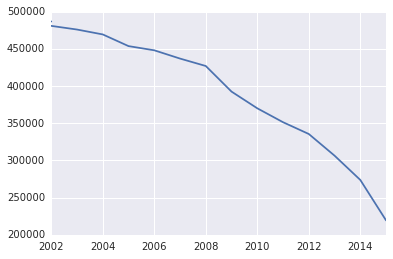

In [13]:
s.plot(kind='line')

In [21]:
Crimetype = df[['Primary Type','Year']]
Crimetype.head()
category_group=Crimetype.groupby(['Year']).sum()
category_group.head()
category_group.unstack().head()
my_plot = category_group.unstack().plot(kind='line',stacked=True,title="Primary Type")
my_plot.set_xlabel("Year")
my_plot.set_ylabel("Number")


TypeError: Empty 'DataFrame': no numeric data to plot

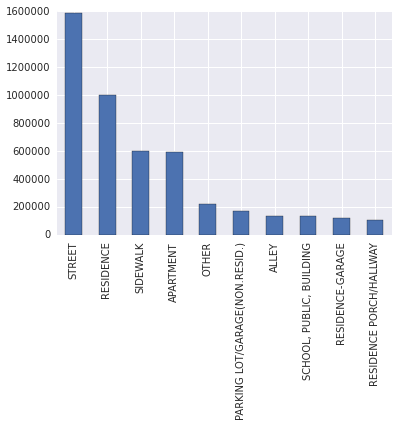

In [53]:
s=df["Location Description"].value_counts()
ls=s.head(10)
ls.plot(kind="bar")

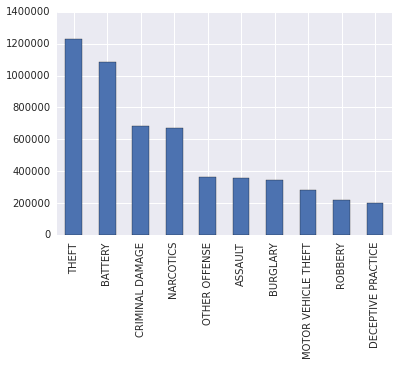

In [54]:
s=df["Primary Type"].value_counts()
ls=s.head(10)
ls.plot(kind="bar")

In [ ]:
s=df["Primary Type"].value_counts()
ls=s.head(10)
ls.plot(kind="bar")

In [ ]:
"""
Demo of a basic pie chart plus a few additional features.

In addition to the basic pie chart, this demo shows a few optional features:

    * slice labels
    * auto-labeling the percentage
    * offsetting a slice with "explode"
    * drop-shadow
    * custom start angle

Note about the custom start angle:

The default ``startangle`` is 0, which would start the "Frogs" slice on the
positive x-axis. This example sets ``startangle = 90`` such that everything is
rotated counter-clockwise by 90 degrees, and the frog slice starts on the
positive y-axis.
"""
import matplotlib.pyplot as plt

# The slices will be ordered and plotted counter-clockwise.
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

fig = plt.figure()
ax = fig.gca()
import numpy as np

ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(0, 0), frame=True)
ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(1, 1), frame=True)
ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(0, 1), frame=True)
ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(1, 0), frame=True)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Sunny", "Cloudy"])
ax.set_yticklabels(["Dry", "Rainy"])
ax.set_xlim((-0.5, 1.5))
ax.set_ylim((-0.5, 1.5))

# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.set_aspect('equal')

plt.show()

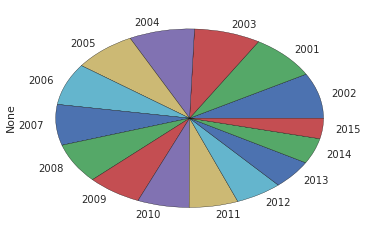

In [47]:

#k=df["Year"].value_counts()
#l=df["Primary Type"].value_counts()
#print (h,k,l)
#print(h)

#category_group=c.groupby[k,h].sum()
#category_group.head()
h=df["Year"].value_counts()
h.head()
h.plot(kind="pie")
#h=list(h)
#new_h = pd.DataFrame(data =h , columns=['Names', 'Count'])
#new_h

In [56]:
s=df["District"].value_counts()
s
#ls=s.head(10)
#ls.plot(kind="bar")

8     407717
11    374602
7     355451
25    346751
6     338926
4     337953
3     305105
9     298327
2     289837
12    289331
19    263896
5     263569
15    262247
18    252222
10    250475
14    236204
1     214150
16    195817
22    195554
24    177739
17    172010
20    103630
31       120
21         4
23         3
13         2
dtype: int64

In [ ]:
Crimetype = df[['Primary Type','Location Description','Year']]
Crimetype.head()
category_group=Crimetype.groupby(['Year']).sum()
category_group.head()
category_group.unstack().head()
my_plot = category_group.unstack().plot(kind='line',stacked=True,title="Primary Type")
my_plot.set_xlabel("Year")
my_plot.set_ylabel("Number")

In [ ]:
top=df["Primary Type"]=='THEFT'
top